In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
import graphviz

# Load Dataset
df = pd.read_csv('heart.csv')

# Check data info
print(df.head())
print(df.info())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       19 non-null     int64  
 1   sex       19 non-null     int64  
 2   cp        19 non-null     int64  
 3   trestbps  19 non-null     int64  
 4   chol      19 non-null     int64  
 5   

In [4]:
# Features and Target
X = df.drop('target', axis=1)
y = df['target']

# Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Decision Tree Accuracy: 0.75

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.50      1.00      0.67         1

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



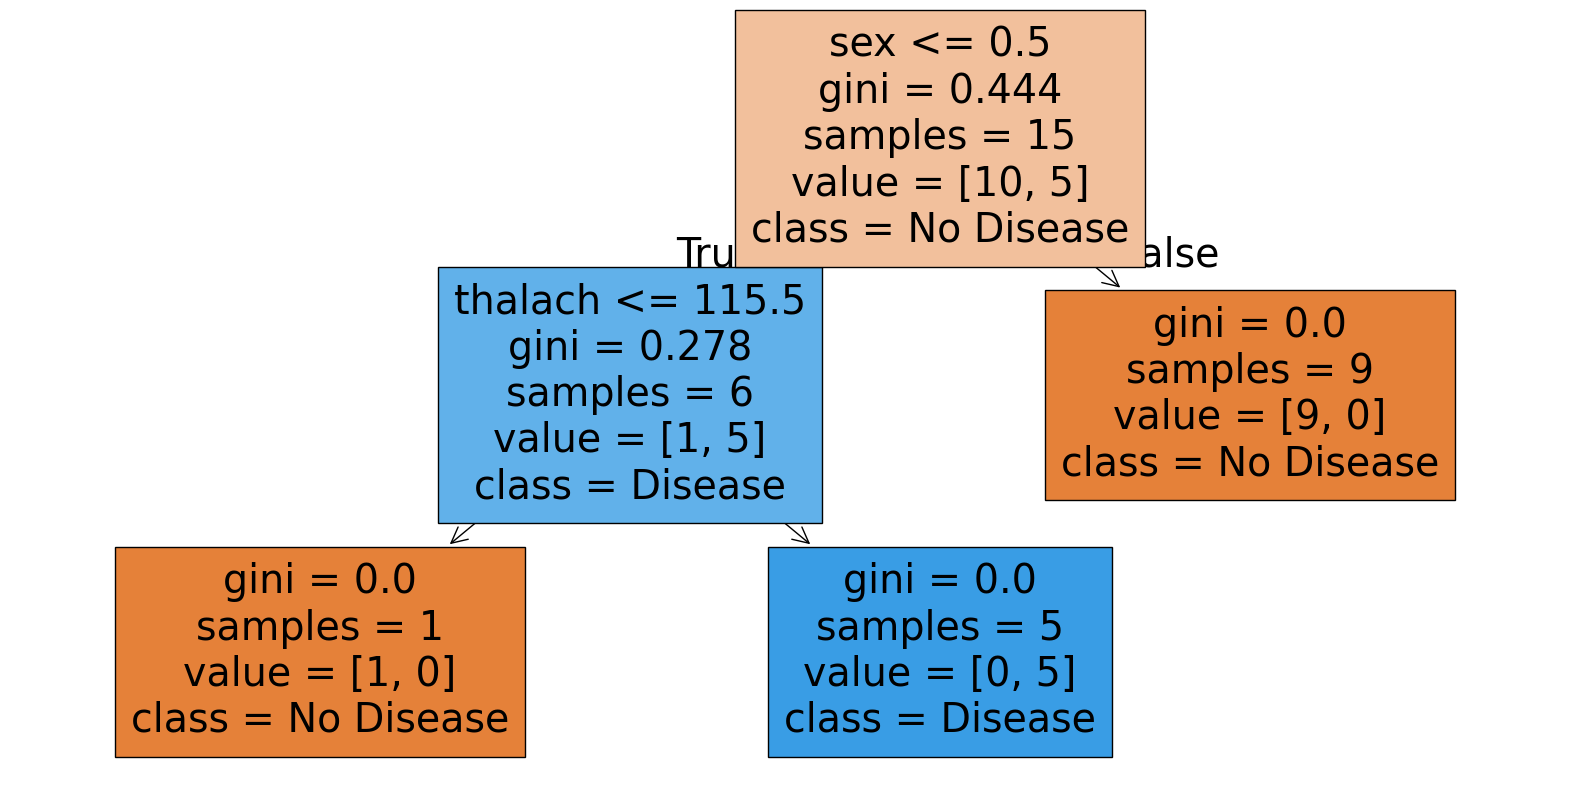

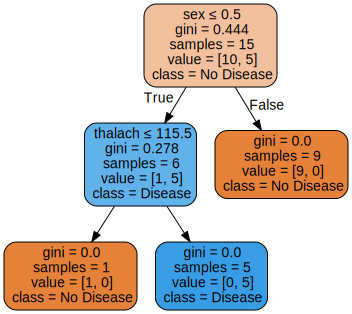

In [5]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Accuracy
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize the tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.show()

# Optional: Export to Graphviz DOT format
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns,
                           class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_heart")  # Saves as decision_tree_heart.pdf
graph


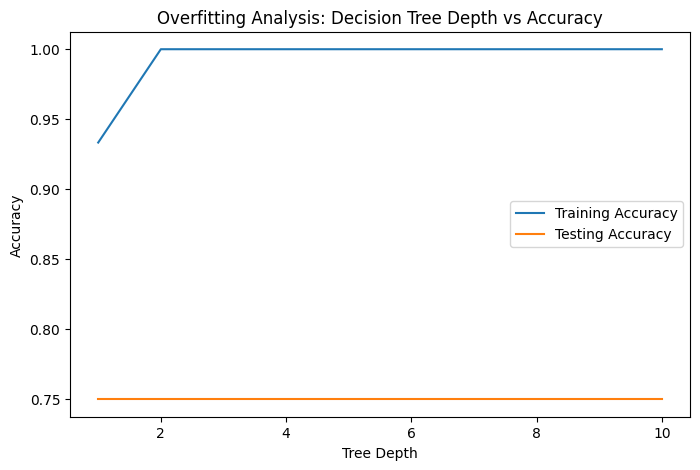

In [6]:
depths = range(1, 11)
train_acc = []
test_acc = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_acc.append(model.score(X_train, y_train))
    test_acc.append(model.score(X_test, y_test))

plt.figure(figsize=(8,5))
plt.plot(depths, train_acc, label='Training Accuracy')
plt.plot(depths, test_acc, label='Testing Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Overfitting Analysis: Decision Tree Depth vs Accuracy')
plt.legend()
plt.show()


In [7]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Accuracy
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Compare Confusion Matrices
print("\nDecision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         1

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4


Decision Tree Confusion Matrix:
 [[2 1]
 [0 1]]

Random Forest Confusion Matrix:
 [[3 0]
 [0 1]]


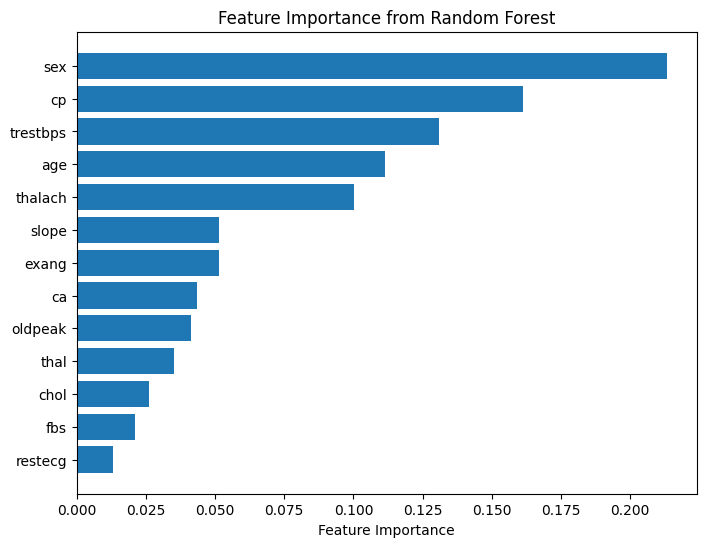

In [8]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.show()


In [9]:
# Cross Validation Accuracy
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\nRandom Forest Cross-Validation Accuracy (5-Fold):", cv_scores.mean())



Random Forest Cross-Validation Accuracy (5-Fold): 1.0
